# **Scraping Tweets with tweepy**

In [5]:
from datetime import datetime, timedelta
import pandas as pd

In [2]:
# Install required packages
!pip install nest_asyncio playwright playwright-stealth pandas --quiet

# Install browser engines (Chromium) for Playwright
!playwright install

164.9 MiB [                    ] 0% 125.5s164.9 MiB [                    ] 0% 21.1s164.9 MiB [                    ] 0% 44.3s164.9 MiB [                    ] 0% 53.3s164.9 MiB [                    ] 0% 21.6s164.9 MiB [                    ] 0% 21.2s164.9 MiB [                    ] 0% 22.3s164.9 MiB [                    ] 0% 21.2s164.9 MiB [                    ] 0% 22.1s164.9 MiB [                    ] 0% 22.0s164.9 MiB [                    ] 0% 22.3s164.9 MiB [                    ] 1% 21.0s164.9 MiB [                    ] 1% 21.2s164.9 MiB [                    ] 1% 20.8s164.9 MiB [                    ] 1% 21.7s164.9 MiB [                    ] 1% 20.9s164.9 MiB [                    ] 1% 21.0s164.9 MiB [                    ] 1% 21.2s164.9 MiB [                    ] 1% 20.9s164.9 MiB [                    ] 1% 21.0s164.9 MiB [                    ] 1% 20.8s164.9 MiB [                    ] 2% 21.3s164.9 MiB [                    ] 2% 21.0s164.9 MiB [                    ] 2% 20.9s164.9 MiB [    

100.9 MiB [                    ] 0% 0.0s100.9 MiB [                    ] 0% 58.8s100.9 MiB [                    ] 0% 36.8s100.9 MiB [                    ] 0% 23.3s100.9 MiB [                    ] 0% 27.6s100.9 MiB [                    ] 0% 23.5s100.9 MiB [                    ] 0% 21.5s100.9 MiB [                    ] 0% 23.9s100.9 MiB [                    ] 0% 23.0s100.9 MiB [                    ] 0% 24.3s100.9 MiB [                    ] 0% 22.0s100.9 MiB [                    ] 1% 22.6s100.9 MiB [                    ] 1% 22.2s100.9 MiB [                    ] 1% 21.0s100.9 MiB [                    ] 1% 21.2s100.9 MiB [                    ] 1% 20.1s100.9 MiB [                    ] 1% 19.4s100.9 MiB [                    ] 1% 19.1s100.9 MiB [                    ] 1% 20.1s100.9 MiB [                    ] 2% 19.6s100.9 MiB [                    ] 2% 19.5s100.9 MiB [                    ] 2% 19.1s100.9 MiB [                    ] 2% 19.3s100.9 MiB [=                   ] 2% 19.4s100.9 MiB [=     

100.9 MiB [=================   ] 85% 2.2s100.9 MiB [=================   ] 86% 2.2s100.9 MiB [=================   ] 86% 2.1s100.9 MiB [=================   ] 86% 2.5s100.9 MiB [=================   ] 87% 2.5s100.9 MiB [=================   ] 87% 2.4s100.9 MiB [==================  ] 87% 2.4s100.9 MiB [==================  ] 88% 2.3s100.9 MiB [==================  ] 88% 2.2s100.9 MiB [==================  ] 88% 2.1s100.9 MiB [==================  ] 89% 2.1s100.9 MiB [==================  ] 89% 2.0s100.9 MiB [==================  ] 89% 1.9s100.9 MiB [==================  ] 90% 1.9s100.9 MiB [==================  ] 90% 1.8s100.9 MiB [==================  ] 90% 1.7s100.9 MiB [==================  ] 91% 1.7s100.9 MiB [==================  ] 91% 1.6s100.9 MiB [==================  ] 92% 1.5s100.9 MiB [=================== ] 92% 1.4s100.9 MiB [=================== ] 93% 1.3s100.9 MiB [=================== ] 93% 1.2s100.9 MiB [=================== ] 94% 1.1s100.9 MiB [=================== ] 94% 1.0s100.9 MiB [=====

92 MiB [                    ] 0% 0.0s92 MiB [                    ] 0% 12.3s92 MiB [                    ] 0% 15.9s92 MiB [                    ] 0% 40.6s92 MiB [                    ] 0% 24.2s92 MiB [                    ] 0% 19.5s92 MiB [                    ] 0% 18.1s92 MiB [                    ] 1% 16.3s92 MiB [                    ] 1% 15.8s92 MiB [                    ] 1% 15.5s92 MiB [                    ] 1% 15.1s92 MiB [                    ] 1% 14.8s92 MiB [                    ] 1% 15.3s92 MiB [                    ] 1% 14.8s92 MiB [                    ] 2% 14.0s92 MiB [                    ] 2% 13.9s92 MiB [                    ] 2% 14.2s92 MiB [=                   ] 2% 14.1s92 MiB [=                   ] 2% 13.9s92 MiB [=                   ] 3% 13.3s92 MiB [=                   ] 3% 13.8s92 MiB [=                   ] 3% 14.0s92 MiB [=                   ] 3% 13.8s92 MiB [=                   ] 3% 13.6s92 MiB [=                   ] 3% 14.0s92 MiB [=                   ] 4% 12.7s92 MiB [=    

92 MiB [===========         ] 56% 5.3s92 MiB [===========         ] 56% 5.2s92 MiB [===========         ] 57% 5.2s92 MiB [============        ] 57% 5.2s92 MiB [============        ] 57% 5.1s92 MiB [============        ] 58% 5.1s92 MiB [============        ] 58% 5.0s92 MiB [============        ] 59% 5.0s92 MiB [============        ] 59% 4.9s92 MiB [============        ] 60% 4.8s92 MiB [============        ] 60% 4.7s92 MiB [============        ] 61% 4.7s92 MiB [============        ] 61% 4.6s92 MiB [============        ] 62% 4.6s92 MiB [=============       ] 62% 4.5s92 MiB [=============       ] 63% 4.5s92 MiB [=============       ] 63% 4.4s92 MiB [=============       ] 64% 4.4s92 MiB [=============       ] 64% 4.3s92 MiB [=============       ] 65% 4.2s92 MiB [=============       ] 66% 4.1s92 MiB [=============       ] 66% 4.0s92 MiB [=============       ] 67% 4.0s92 MiB [==============      ] 67% 3.9s92 MiB [==============      ] 68% 3.9s92 MiB [==============      ] 68% 3.8s92 MiB [====

In [1]:
import nest_asyncio
nest_asyncio.apply()

In [91]:
# Manual Login

import asyncio
from playwright.async_api import async_playwright

async def login_and_save_storage():
    async with async_playwright() as p:
        browser = await p.chromium.launch(headless=False)
        context = await browser.new_context()
        page = await context.new_page()

        await page.goto("https://twitter.com/login")
        print("🕐 Please log in manually in the browser window...")

        await asyncio.sleep(70)  # Give yourself time to log in

        await context.storage_state(path="twitter_auth.json")
        print("✅ Session saved to twitter_auth.json")
        await browser.close()

asyncio.run(login_and_save_storage())

🕐 Please log in manually in the browser window...
✅ Session saved to twitter_auth.json


In [41]:
import asyncio
from playwright.async_api import async_playwright
# Testing scraping method for single tweet 

async def test_single_tweet():
    async with async_playwright() as p:
        browser = await p.chromium.launch(headless=True)
        context = await browser.new_context()
        page = await context.new_page()

        # Navigate to a single tweet
        await page.goto("https://x.com/StockMKTNewz/status/1889344331053404337")

        # Extract Tweet
        await page.wait_for_selector("article[aria-labelledby]", timeout=10000)  # Wait for up to 10s
        tweet = await page.query_selector("article[aria-labelledby]")

        if tweet:
            try:
                # Extract Date
                time_element = await tweet.query_selector("time")
                date = await time_element.get_attribute("datetime") if time_element else "Unknown"

                # Extract Text
                text_element = await tweet.query_selector("div[lang]")
                text = await text_element.inner_text() if text_element else "Unknown"

                # Extract Username
                handles = await tweet.query_selector_all("a")
                username = "Unknown"
                for h in handles:
                    handle_text = await h.inner_text() or await h.evaluate("(el) => el.textContent")
                    if handle_text.startswith("@"):
                        username = handle_text
                        break  # Stop at first valid username

                print(f"📌 Tweet Extracted:\n- Date: {date}\n- Username: {username}\n- Text: {text}")

            except Exception as e:
                print(f"⚠️ Error extracting tweet: {e}")

        else:
            print("🚨 No tweet found!")

        await browser.close()

# Run the test
asyncio.run(test_single_tweet())

📌 Tweet Extracted:
- Date: 2025-02-11T16:02:45.000Z
- Username: @StockMKTNewz
- Text: Netflix $NFLX is exploring partnerships with podcasters to bring video podcasts to its platform - Insider


In [93]:
import asyncio
import nest_asyncio
import random
import pandas as pd
from datetime import datetime, timedelta
from playwright.async_api import async_playwright

nest_asyncio.apply()

async def scrape_twitter(stock, start_date, end_date, accounts, retries=3, timeout=120000):
    async with async_playwright() as p:
        browser = await p.chromium.launch(headless=False)
        context = await browser.new_context(storage_state="twitter_auth.json")
        page = await context.new_page()

        all_tweets = []  # Store tweets from all accounts

        for account in accounts:
            print(f"🔄 Collecting tweets for {account} from {start_date} to {end_date}")
            search_query = f"{stock} from:{account} since:{start_date} until:{end_date} lang:en"
            final_url = (
                f"https://twitter.com/search?q={search_query.replace(' ', '%20')}&src=typed_query&f=live"
            )

            print(f"🔍 Searching {account}: {final_url}")
            await page.goto(final_url, timeout=timeout)

            # Click "Latest" tab explicitly after search loads
            try:
                await page.wait_for_selector("text=Latest", timeout=10000)
                await page.click("text=Latest")
                print("✅ Clicked 'Latest' tab.")
            except Exception as e:
                print(f"⚠️ 'Latest' tab click skipped - error: {e}")

            # Ensure tweets load before scraping, but handle cases where no tweets exist
            try:
                await page.wait_for_selector("article[aria-labelledby], article", timeout=15000)
            except:
                print(f"⚠️ No tweets found for {account}. Skipping...")
                all_tweets.append({"tweet": "No tweets found", "date": "N/A", "account": account})
                continue  # Skip to the next account

            # Fetch initial tweets
            tweet_elements = await page.query_selector_all("article[aria-labelledby], article")
            print(f"🔍 Found {len(tweet_elements)} tweets before scrolling.")

            # Scroll dynamically **only if tweets exist**
            if tweet_elements:
                previous_tweet_count = 0
                scroll_attempts = 0

                while scroll_attempts < 50:  # Avoid infinite scrolling
                    await page.evaluate("window.scrollBy(0, 2000 + Math.random() * 500)")
                    await asyncio.sleep(random.uniform(2, 5))

                    tweet_elements = await page.query_selector_all("article[aria-labelledby], article")
                    current_tweet_count = len(tweet_elements)

                    if current_tweet_count == previous_tweet_count:  # No new tweets loaded
                        print(f"✅ No new tweets detected for {account}, stopping scroll.")
                        break

                    previous_tweet_count = current_tweet_count
                    scroll_attempts += 1
            else:
                print(f"⚠️ No tweets detected initially for {account}, skipping scrolling.")

            # Extract tweets
            for tweet in tweet_elements:
                try:
                    time_element = await tweet.query_selector("time")
                    date = await time_element.get_attribute("datetime") if time_element else "Unknown"

                    text_element = await tweet.query_selector("div[lang]")
                    text = await text_element.inner_text() if text_element else "Unknown"

                    handles = await tweet.query_selector_all("a")
                    username = "Unknown"
                    for h in handles:
                        handle_text = await h.inner_text() or await h.evaluate("(el) => el.textContent")
                        if handle_text.startswith("@"): 
                            username = handle_text
                            break

                    # Append all tweets without filtering by "$NFLX"
                    all_tweets.append({
                        "tweet": text.strip(),
                        "date": date,
                        "account": username
                    })

                except Exception as e:
                    print(f"⚠️ Error processing tweet: {e}")

        await browser.close()
        return pd.DataFrame(all_tweets).drop_duplicates(subset=["tweet"])  # Remove duplicate tweets


async def collect_tweets(stock, start_date, end_date, accounts, filename_prefix):
    current_date = datetime.strptime(start_date, "%Y-%m-%d")
    end_date_dt = datetime.strptime(end_date, "%Y-%m-%d")
    all_tweets = pd.DataFrame()
    weeks_processed = 0

    while current_date < end_date_dt:
        week_end = min(current_date + timedelta(days=7), end_date_dt)
        week_start_str = current_date.strftime("%Y-%m-%d")
        week_end_str = week_end.strftime("%Y-%m-%d")
        print(f"🔄 Collecting tweets from {week_start_str} to {week_end_str}")

        weekly_df = await scrape_twitter(stock, week_start_str, week_end_str, accounts)
        all_tweets = pd.concat([all_tweets, weekly_df], ignore_index=True)
        current_date = week_end
        weeks_processed += 1

        # Save progress every 4 weeks
        if weeks_processed % 4 == 0:
            checkpoint_file = f"{filename_prefix}_checkpoint_{week_start_str}.csv"
            all_tweets.to_csv(checkpoint_file, index=False)
            print(f"💾 Saved intermediate results to {checkpoint_file}")

    return all_tweets

start_date = "2025-02-09"
end_date = "2025-02-13"
    
async def main():
    accounts = ["cnbc", "BreakoutStocks", "Stocktwits", "WSJ", "reuters", "forbes", "RobinJPowell","WSJDealJournal", "Benzinga", "EventDrivenMgr", "SeekingAlpha", "WSJmarkets", "Business","tradingguru", "marketcurrents", "financialtimes", "elonmusk", "SpiegelPeter", "BillGates", "bespokeinvest", "AlphaTrends", "StockMKTNewz", "PeterLBrandt", "JPMorgan", "SvenHenrich", "Bloomberg"]

    
    netflix_tweets = await collect_tweets("Netflix OR $NFLX", start_date, end_date, accounts, "netflix")
    netflix_tweets.to_csv("netflix_tweets_final.csv", index=False)
    print(f"✅ Saved {len(netflix_tweets)} tweets for Netflix to netflix_tweets_final.csv")
    
    amazon_tweets = await collect_tweets("Amazon OR $AMZN", start_date, end_date, accounts, "amazon")
    amazon_tweets.to_csv("amazon_tweets_final.csv", index=False)
    print(f"✅ Saved {len(amazon_tweets)} tweets for Amazon to amazon_tweets_final.csv")

asyncio.run(main())

🔄 Collecting tweets from 2025-02-09 to 2025-02-13
🔄 Collecting tweets for cnbc from 2025-02-09 to 2025-02-13
🔍 Searching cnbc: https://twitter.com/search?q=Amazon%20OR%20$AMZN%20from:cnbc%20since:2025-02-09%20until:2025-02-13%20lang:en&src=typed_query&f=live
✅ Clicked 'Latest' tab.
🔍 Found 4 tweets before scrolling.
✅ No new tweets detected for cnbc, stopping scroll.
🔄 Collecting tweets for BreakoutStocks from 2025-02-09 to 2025-02-13
🔍 Searching BreakoutStocks: https://twitter.com/search?q=Amazon%20OR%20$AMZN%20from:BreakoutStocks%20since:2025-02-09%20until:2025-02-13%20lang:en&src=typed_query&f=live
✅ Clicked 'Latest' tab.
⚠️ No tweets found for BreakoutStocks. Skipping...
🔄 Collecting tweets for Stocktwits from 2025-02-09 to 2025-02-13
🔍 Searching Stocktwits: https://twitter.com/search?q=Amazon%20OR%20$AMZN%20from:Stocktwits%20since:2025-02-09%20until:2025-02-13%20lang:en&src=typed_query&f=live
✅ Clicked 'Latest' tab.
⚠️ No tweets found for Stocktwits. Skipping...
🔄 Collecting tweet

In [140]:
netflix_df = pd.read_csv("netflix_tweets_final.csv")
amazon_df = pd.read_csv("amazon_tweets_final.csv")
amazon_df.head(50)

,tweet,date,account
0,What happens next for Amazon?\n\nIf the last 1...,2025-02-12T20:27:43.000Z,@CNBC
1,"Amazon primed for another comeback, according ...",2025-02-12T19:22:52.000Z,@CNBC
2,Amazon opens beauty and personal care store in...,2025-02-11T22:16:45.000Z,@CNBC
3,Here are Monday's biggest analyst calls: Nvidi...,2025-02-10T13:34:12.000Z,@CNBC
4,No tweets found,NaN,BreakoutStocks
5,Brazil's Lula to meet with agency on Petrobras...,2025-02-12T19:35:06.000Z,@Reuters
6,Amazon Presidents’ Day Sale Just Started—Here ...,2025-02-11T00:30:05.000Z,@Forbes
7,Amazon And Laurene Powell Jobs Are Betting On ...,2025-02-09T05:30:05.000Z,@Forbes


In [141]:
netflix_df.shape

(8, 3)

#**Tweet Preprocessing**

In [194]:
# Combining both dataframes into one with adding a column of netflix / amzn
amazon_df["stock"] = "amazon"
netflix_df["stock"] = "netflix"
tweet_df = pd.concat([amazon_df, netflix_df])
tweet_df["date"] = pd.to_datetime(tweet_df["date"]).dt.date
tweet_df = tweet_df[tweet_df["tweet"] != "No tweets found"]
tweet_df

,tweet,date,account,stock
0,What happens next for Amazon?\n\nIf the last 1...,2025-02-12,@CNBC,amazon
1,"Amazon primed for another comeback, according ...",2025-02-12,@CNBC,amazon
2,Amazon opens beauty and personal care store in...,2025-02-11,@CNBC,amazon
3,Here are Monday's biggest analyst calls: Nvidi...,2025-02-10,@CNBC,amazon
5,Brazil's Lula to meet with agency on Petrobras...,2025-02-12,@Reuters,amazon
6,Amazon Presidents’ Day Sale Just Started—Here ...,2025-02-11,@Forbes,amazon
7,Amazon And Laurene Powell Jobs Are Betting On ...,2025-02-09,@Forbes,amazon
0,RT This is a sheer assault on U.S. democracy a...,2025-02-11,@TradingGuru,netflix
1,RT \n@realDonaldTrump\n the convicted-felon-in...,2025-02-11,@TradingGuru,netflix
2,What a fucking imbecile with IQ as gold fish $...,2025-02-10,@TradingGuru,netflix


In [195]:
import preprocessor as p
import nltk
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

# Download NLTK resources
nltk.download("punkt")
nltk.download("wordnet")

lemmatizer = WordNetLemmatizer()

# Define financial stopwords that should NOT be removed
financial_stopwords = {"up", "down", "bullish", "bearish", "profit", "loss", "growth", "decline"}

def preprocess_pipeline(tweet):
    # Step 1: Remove URLs, mentions, hashtags, emojis, and reserved words
    tweet = p.clean(str(tweet))

    # Step 2: Remove stock symbols ($NFLX, $AMZN)
    tweet = re.sub(r"[$]+[a-zA-Z]+", "", tweet)

    # Step 3: Remove punctuation & numbers
    tweet = re.sub(r"[^a-zA-Z\s]", "", tweet)

    # Step 4: Normalize text (reduce lengthening)
    pattern = re.compile(r"(.)\1{2,}")
    tweet = pattern.sub(r"\1\1", tweet)

    # Step 5: Convert to lowercase
    tweet = tweet.lower()

    # Step 6: Tokenization & Stopword Removal (EXCLUDING financial stopwords)
    tokens = word_tokenize(tweet)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stopwords.words("english") or word in financial_stopwords]

    return " ".join(tokens)  # Convert back to string

# Apply pipeline to all tweets
tweet_df["processed_tweet"] = tweet_df["tweet"].apply(preprocess_pipeline)

tweet_df.head()

[nltk_data] Downloading package punkt to /home/ilse/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/ilse/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,tweet,date,account,stock,processed_tweet
0,What happens next for Amazon?\n\nIf the last 1...,2025-02-12,@CNBC,amazon,happens next amazonif last month indication st...
1,"Amazon primed for another comeback, according ...",2025-02-12,@CNBC,amazon,amazon primed another comeback according chart
2,Amazon opens beauty and personal care store in...,2025-02-11,@CNBC,amazon,amazon open beauty personal care store italy p...
3,Here are Monday's biggest analyst calls: Nvidi...,2025-02-10,@CNBC,amazon,monday biggest analyst call nvidia tesla mobil...
5,Brazil's Lula to meet with agency on Petrobras...,2025-02-12,@Reuters,amazon,brazil lula meet agency petrobras bid drill ne...


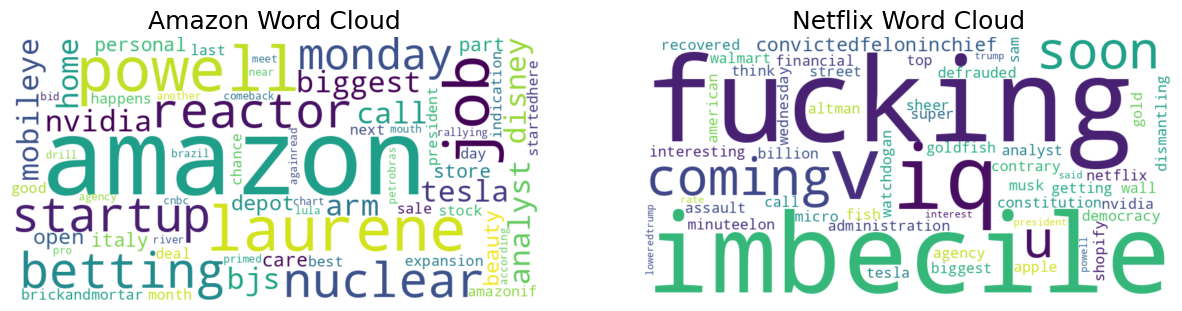

In [220]:
# wordcloud function

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filter tweets for Amazon and Netflix separately
amazon_tweets = " ".join(tweet_df[tweet_df["stock"] == "amazon"]["processed_tweet"])
netflix_tweets = " ".join(tweet_df[tweet_df["stock"] == "netflix"]["processed_tweet"])

# Generate word clouds
amazon_wordcloud = WordCloud(background_color="white", width=800, height=400).generate(amazon_tweets)
netflix_wordcloud = WordCloud(background_color="white", width=800, height=400).generate(netflix_tweets)

# Display word clouds side by side
fig, ax = plt.subplots(1, 2, figsize=(15, 7))

ax[0].imshow(amazon_wordcloud, interpolation="bilinear")
ax[0].set_title("Amazon Word Cloud", fontsize=18)
ax[0].axis("off")

ax[1].imshow(netflix_wordcloud, interpolation="bilinear")
ax[1].set_title("Netflix Word Cloud", fontsize=18)
ax[1].axis("off")

plt.show()

# **VADER - Sentiment Analysis**

In [144]:
!pip install vaderSentiment

In [196]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [197]:
# Get Sentiment after pre-processing

tweet_df['neg'] = tweet_df["processed_tweet"].apply(lambda x:analyser.polarity_scores(x)['neg'])
tweet_df['neu'] = tweet_df["processed_tweet"].apply(lambda x:analyser.polarity_scores(x)['neu'])
tweet_df['pos'] = tweet_df["processed_tweet"].apply(lambda x:analyser.polarity_scores(x)['pos'])
tweet_df['compound'] = tweet_df["processed_tweet"].apply(lambda x:analyser.polarity_scores(x)['compound'])

tweet_df

,tweet,date,account,stock,processed_tweet,neg,neu,pos,compound
0,What happens next for Amazon?\n\nIf the last 1...,2025-02-12,@CNBC,amazon,happens next amazonif last month indication st...,0.000,0.692,0.308,0.5994
1,"Amazon primed for another comeback, according ...",2025-02-12,@CNBC,amazon,amazon primed another comeback according chart,0.000,0.746,0.254,0.1779
2,Amazon opens beauty and personal care store in...,2025-02-11,@CNBC,amazon,amazon open beauty personal care store italy p...,0.000,0.446,0.554,0.8271
3,Here are Monday's biggest analyst calls: Nvidi...,2025-02-10,@CNBC,amazon,monday biggest analyst call nvidia tesla mobil...,0.000,0.876,0.124,0.1779
5,Brazil's Lula to meet with agency on Petrobras...,2025-02-12,@Reuters,amazon,brazil lula meet agency petrobras bid drill ne...,0.000,0.855,0.145,0.1779
6,Amazon Presidents’ Day Sale Just Started—Here ...,2025-02-11,@Forbes,amazon,amazon president day sale startedhere best deal,0.000,0.459,0.541,0.7096
7,Amazon And Laurene Powell Jobs Are Betting On ...,2025-02-09,@Forbes,amazon,amazon laurene powell job betting nuclear reac...,0.000,0.805,0.195,0.1779
0,RT This is a sheer assault on U.S. democracy a...,2025-02-11,@TradingGuru,netflix,sheer assault u democracy constitution convict...,0.388,0.612,0.000,-0.5859
1,RT \n@realDonaldTrump\n the convicted-felon-in...,2025-02-11,@TradingGuru,netflix,convictedfeloninchief dismantling us top finan...,0.000,0.870,0.130,0.2023
2,What a fucking imbecile with IQ as gold fish $...,2025-02-10,@TradingGuru,netflix,fucking imbecile iq gold fish,0.466,0.534,0.000,-0.5413


In [199]:
##Defining classes
def analyse_sentiment(compound):
    if compound > 0:
        return "Positive_VADER"
    if compound == 0:
        return "Neutral_VADER"
    if compound < 0:
        return "Negative_VADER"

# Apply the funtion on Polarity column and add the results into a new column
tweet_df["class_VADER"] = tweet_df["compound"].apply(analyse_sentiment)

print(tweet_df.shape)
tweet_df

(14, 10)


,tweet,date,account,stock,processed_tweet,neg,neu,pos,compound,class_VADER
0,What happens next for Amazon?\n\nIf the last 1...,2025-02-12,@CNBC,amazon,happens next amazonif last month indication st...,0.000,0.692,0.308,0.5994,Positive_VADER
1,"Amazon primed for another comeback, according ...",2025-02-12,@CNBC,amazon,amazon primed another comeback according chart,0.000,0.746,0.254,0.1779,Positive_VADER
2,Amazon opens beauty and personal care store in...,2025-02-11,@CNBC,amazon,amazon open beauty personal care store italy p...,0.000,0.446,0.554,0.8271,Positive_VADER
3,Here are Monday's biggest analyst calls: Nvidi...,2025-02-10,@CNBC,amazon,monday biggest analyst call nvidia tesla mobil...,0.000,0.876,0.124,0.1779,Positive_VADER
5,Brazil's Lula to meet with agency on Petrobras...,2025-02-12,@Reuters,amazon,brazil lula meet agency petrobras bid drill ne...,0.000,0.855,0.145,0.1779,Positive_VADER
6,Amazon Presidents’ Day Sale Just Started—Here ...,2025-02-11,@Forbes,amazon,amazon president day sale startedhere best deal,0.000,0.459,0.541,0.7096,Positive_VADER
7,Amazon And Laurene Powell Jobs Are Betting On ...,2025-02-09,@Forbes,amazon,amazon laurene powell job betting nuclear reac...,0.000,0.805,0.195,0.1779,Positive_VADER
0,RT This is a sheer assault on U.S. democracy a...,2025-02-11,@TradingGuru,netflix,sheer assault u democracy constitution convict...,0.388,0.612,0.000,-0.5859,Negative_VADER
1,RT \n@realDonaldTrump\n the convicted-felon-in...,2025-02-11,@TradingGuru,netflix,convictedfeloninchief dismantling us top finan...,0.000,0.870,0.130,0.2023,Positive_VADER
2,What a fucking imbecile with IQ as gold fish $...,2025-02-10,@TradingGuru,netflix,fucking imbecile iq gold fish,0.466,0.534,0.000,-0.5413,Negative_VADER


In [200]:
tweet_df = tweet_df.sort_values(by="date", ascending=True) 
tweet_df

,tweet,date,account,stock,processed_tweet,neg,neu,pos,compound,class_VADER
7,Amazon And Laurene Powell Jobs Are Betting On ...,2025-02-09,@Forbes,amazon,amazon laurene powell job betting nuclear reac...,0.000,0.805,0.195,0.1779,Positive_VADER
3,Here are Monday's biggest analyst calls: Nvidi...,2025-02-10,@CNBC,amazon,monday biggest analyst call nvidia tesla mobil...,0.000,0.876,0.124,0.1779,Positive_VADER
2,What a fucking imbecile with IQ as gold fish $...,2025-02-10,@TradingGuru,netflix,fucking imbecile iq gold fish,0.466,0.534,0.000,-0.5413,Negative_VADER
3,"RT I think, contrary to this fucking imbecile ...",2025-02-10,@TradingGuru,netflix,think contrary fucking imbecile iq like goldfish,0.310,0.444,0.246,-0.1851,Negative_VADER
7,This is getting more interesting by the minute...,2025-02-10,@Stocktwits,netflix,getting interesting minuteelon musk v sam altm...,0.000,0.748,0.252,0.4019,Positive_VADER
2,Amazon opens beauty and personal care store in...,2025-02-11,@CNBC,amazon,amazon open beauty personal care store italy p...,0.000,0.446,0.554,0.8271,Positive_VADER
6,Amazon Presidents’ Day Sale Just Started—Here ...,2025-02-11,@Forbes,amazon,amazon president day sale startedhere best deal,0.000,0.459,0.541,0.7096,Positive_VADER
0,RT This is a sheer assault on U.S. democracy a...,2025-02-11,@TradingGuru,netflix,sheer assault u democracy constitution convict...,0.388,0.612,0.000,-0.5859,Negative_VADER
1,RT \n@realDonaldTrump\n the convicted-felon-in...,2025-02-11,@TradingGuru,netflix,convictedfeloninchief dismantling us top finan...,0.000,0.870,0.130,0.2023,Positive_VADER
0,What happens next for Amazon?\n\nIf the last 1...,2025-02-12,@CNBC,amazon,happens next amazonif last month indication st...,0.000,0.692,0.308,0.5994,Positive_VADER


In [201]:
# Generate dummy variables for class_VADER
dummies_VADER = pd.get_dummies(tweet_df["class_VADER"])
tweet_df = pd.concat([tweet_df, dummies_VADER], axis=1)

# Ensure all expected columns exist before grouping
expected_cols = ["Negative_VADER", "Neutral_VADER", "Positive_VADER"]
for col in expected_cols:
    if col not in tweet_df.columns:
        tweet_df[col] = 0  # Add missing column with default value

# Group by date to sum counts per day
nrclass_VADER = tweet_df.groupby(["stock","date"])[expected_cols].sum().reset_index()

# Shift values forward by one day **one column at a time** to avoid length mismatch
for col in expected_cols:
    nrclass_VADER[col] = nrclass_VADER[col].shift(1)

tweet_sentiment_df = nrclass_VADER

In [202]:
### DOUBLE CHECK if we have any NaN in the sentiment
tweet_sentiment_df.isna().sum()

stock             0
date              0
Negative_VADER    1
Neutral_VADER     1
Positive_VADER    1
dtype: int64

In [ ]:
# Store the Data after Sentiment Analysis
tweet_sentiment_df.to_csv("tweet_sentiment_df.csv")

## Compare the Distrubution of Sentiment Classes across the stocks

### Upload the merged data sets for all three stocks

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving merged_dataset_Amazon_FinAcc.csv to merged_dataset_Amazon_FinAcc.csv
Saving merged_dataset_Google_FinAcc.csv to merged_dataset_Google_FinAcc.csv
Saving merged_dataset_Netflix_FinAcc.csv to merged_dataset_Netflix_FinAcc.csv


In [ ]:
import pandas as pd
Tweets_df1 = pd.read_csv("merged_dataset_Google_FinAcc.csv")
Tweets_df2 = pd.read_csv("merged_dataset_Netflix_FinAcc.csv")
Tweets_df3 = pd.read_csv("merged_dataset_Amazon_FinAcc.csv")


In [203]:
# Grouped Bar Chart

import plotly.graph_objects as go

# Group by stock and sum sentiment values
sentiment_sums = tweet_sentiment_df.groupby("stock")[["Negative_VADER", "Neutral_VADER", "Positive_VADER"]].sum().reset_index()

# Create grouped bar chart
fig = go.Figure(data=[
    go.Bar(name="Neutral", x=sentiment_sums["stock"], y=sentiment_sums["Neutral_VADER"]),
    go.Bar(name="Negative", x=sentiment_sums["stock"], y=sentiment_sums["Negative_VADER"]),
    go.Bar(name="Positive", x=sentiment_sums["stock"], y=sentiment_sums["Positive_VADER"])
])

# Update layout
fig.update_layout(
    barmode="group",
    title_text="Distribution of Sentiment Classes for Netflix & Amazon",
    title_font=dict(size=30),
    plot_bgcolor="white",
    xaxis_title="Stock",
    yaxis_title="Sentiment Count"
)

fig.show()


# **Getting Yahoo data**

In [211]:
import yfinance as yf

# Fetch historical market data
AMZN = yf.Ticker("AMZN")
NFLX = yf.Ticker("NFLX")

# Get historical data for Amazon
amazon_hist = AMZN.history(start="2025-02-09", end="2025-02-13")
amazon_hist["stock"] = "amazon"  # Add stock identifier

# Get historical data for Netflix
netflix_hist = NFLX.history(start="2025-02-09", end="2025-02-13")
netflix_hist["stock"] = "netflix"  # Add stock identifier

# Combine both datasets
financials = pd.concat([amazon_hist, netflix_hist], ignore_index=False)

print(financials.shape)
financials

#should replace for var
#start_date = "2025-02-09"
#end_date = "2025-02-13"

(6, 8)


,Open,High,Low,Close,Volume,Dividends,Stock Splits,stock
Date,,,,,,,,
2025-02-10 00:00:00-05:00,230.550003,233.919998,229.199997,233.139999,35419900,0.0,0.0,amazon
2025-02-11 00:00:00-05:00,231.919998,233.440002,230.130005,232.759995,23713700,0.0,0.0,amazon
2025-02-12 00:00:00-05:00,230.460007,231.179993,228.160004,228.929993,32285200,0.0,0.0,amazon
2025-02-10 00:00:00-05:00,1023.049988,1032.849976,1015.880005,1027.599976,3296600,0.0,0.0,netflix
2025-02-11 00:00:00-05:00,1020.789978,1022.690002,1002.950012,1008.080017,3331800,0.0,0.0,netflix
2025-02-12 00:00:00-05:00,1005.489990,1027.739990,998.349976,1027.310059,3389000,0.0,0.0,netflix


In [212]:
##Calculate returns
financials["returns"]=financials["Close"]/financials["Close"].shift(1)-1

##Get class
def analyse_returns(returns):
    if returns >= 0:
        return "1"
    else:
      return "0"

# Apply the function on return column and add the results into a new column
financials["return_sign"] = financials["returns"].apply(analyse_returns)

print(financials.shape)
financials

(6, 10)


,Open,High,Low,Close,Volume,Dividends,Stock Splits,stock,returns,return_sign
Date,,,,,,,,,,
2025-02-10 00:00:00-05:00,230.550003,233.919998,229.199997,233.139999,35419900,0.0,0.0,amazon,NaN,0
2025-02-11 00:00:00-05:00,231.919998,233.440002,230.130005,232.759995,23713700,0.0,0.0,amazon,-0.001630,0
2025-02-12 00:00:00-05:00,230.460007,231.179993,228.160004,228.929993,32285200,0.0,0.0,amazon,-0.016455,0
2025-02-10 00:00:00-05:00,1023.049988,1032.849976,1015.880005,1027.599976,3296600,0.0,0.0,netflix,3.488708,1
2025-02-11 00:00:00-05:00,1020.789978,1022.690002,1002.950012,1008.080017,3331800,0.0,0.0,netflix,-0.018996,0
2025-02-12 00:00:00-05:00,1005.489990,1027.739990,998.349976,1027.310059,3389000,0.0,0.0,netflix,0.019076,1


In [213]:
## Dropping unnecessary columns
financials = financials.reset_index()
financials["date"] = pd.to_datetime(financials["Date"]).dt.date
financials = financials.drop(columns=["Open","High","Low","Close","Volume","Dividends", "Stock Splits","returns","Date"])
print(financials.shape)
financials

(6, 3)


,stock,return_sign,date
0,amazon,0,2025-02-10
1,amazon,0,2025-02-11
2,amazon,0,2025-02-12
3,netflix,1,2025-02-10
4,netflix,0,2025-02-11
5,netflix,1,2025-02-12


In [ ]:
#print(hist.dropna().shape)

#hist.dropna()  --> There is no more NaN at this point, since we already classified original returns >= 0 as Positive (or equal to 1) ...
#BUT it's fine since we merge with Sentiment anyway and there we can drop NaN because of shift

# **Supervised Machine Learning - SML**

## **Doing SML on 3 sentiment classes(3 explanatory variable)**

### Merge the Datasets

In [214]:
###Merge
merged_sentiment = tweet_sentiment_df.merge(financials, on=["stock", "date"], how="inner")


print(merged_sentiment.shape)
merged_sentiment

# We have NaN in the first row --> So we drop(0) / dropna() in the next step

(6, 6)


,stock,date,Negative_VADER,Neutral_VADER,Positive_VADER,return_sign
0,amazon,2025-02-10,0.0,0.0,1.0,0
1,amazon,2025-02-11,0.0,0.0,1.0,0
2,amazon,2025-02-12,0.0,0.0,2.0,0
3,netflix,2025-02-10,0.0,0.0,3.0,1
4,netflix,2025-02-11,2.0,0.0,1.0,0
5,netflix,2025-02-12,1.0,0.0,1.0,1


In [216]:
merged_sentiment = merged_sentiment.dropna()  ### --> Drops by NaN  (but same result as code below)

print(merged_sentiment.shape)
merged_sentiment

(6, 6)


,stock,date,Negative_VADER,Neutral_VADER,Positive_VADER,return_sign
0,amazon,2025-02-10,0.0,0.0,1.0,0
1,amazon,2025-02-11,0.0,0.0,1.0,0
2,amazon,2025-02-12,0.0,0.0,2.0,0
3,netflix,2025-02-10,0.0,0.0,3.0,1
4,netflix,2025-02-11,2.0,0.0,1.0,0
5,netflix,2025-02-12,1.0,0.0,1.0,1


In [ ]:
# Store the Data set for further Analysis
merged_sentiment.to_csv("merged_dataset.csv")

### Train Test Split

In [221]:
#import numpy as np

y = merged_sentiment["return_sign"].to_numpy()

print(y)

['0' '0' '0' '1' '0' '1']


In [223]:
!git init


Initialized empty Git repository in /home/ilse/code/Ilse-hutten/2025_04_Tweet_scraping/.git/


In [224]:
!git status


On branch master

No commits yet

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	.ipynb_checkpoints/
	Twitter_Sentiment_Trading_Strategy.ipynb
	Twitter_Sentiment_Trading_Strategy.ipynb:Zone.Identifier
	amazon_tweets_final.csv
	netflix_checkpoint_2024-01-22.csv
	netflix_tweets_final.csv
	old/
	tweet_df.xlsx
	twitter_auth.json

nothing added to commit but untracked files present (use "git add" to track)


In [232]:
!git remote add origin https://github.com/Ilse-hutten/Tweet_scraping.git

error: remote origin already exists.


In [233]:
!git add Twitter_Sentiment_Trading_Strategy.ipynb
!git commit -m "Saved progress in Jupyter Notebook"

[master c01b545] Saved progress in Jupyter Notebook
 1 file changed, 60 insertions(+), 2 deletions(-)


In [235]:
!git push origin main

error: src refspec main does not match any
error: failed to push some refs to 'https://github.com/Ilse-hutten/2025_04_Tweet_scraping.git'


In [236]:
!git remote -v

origin	https://github.com/Ilse-hutten/2025_04_Tweet_scraping.git (fetch)
origin	https://github.com/Ilse-hutten/2025_04_Tweet_scraping.git (push)


In [ ]:
random_seed_val = 100

from sklearn.model_selection import train_test_split

x_1 = merged3sentiment.iloc[:, 1:4].to_numpy()  # We DON'T need the reshape here since it is a (n x 3) matrix and not just a (n x 1) vector as in the case of Polarity


x_1_train, x_1_test, y_train, y_test = train_test_split(
    x_1, y, test_size=0.2, shuffle=False)


In [ ]:
print(x_1.shape)
#print(x_1)


### Create Data Frame of x_1 & x_1_train and x_1_test and export them to CSV in order to check if "shuffle = False" has worked properly

#x_1_DF = pd.DataFrame(x_1)
#x_1_DF.head(248)
#x_1_DF.to_csv(r'C:\Users\jensb\Documents\0000 - DSBA\1 - Project\x_1_before split.csv')

### For some reason the export of the CSV file has not worked for me

(251, 3)


In [ ]:
print(x_1_train.shape)
#print(x_1_train)

print(x_1_test.shape)
#print(x_1_test)

(200, 3)
(51, 3)


In [ ]:
## WS Scaling Code

##Scaling data
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#X_train_3sent  = scaler.fit_transform(X_train_3sent)
#X_test_3sent  = scaler.fit_transform(X_test_3sent)

### The Models

#### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(random_state=random_seed_val).fit(x_1_train, y_train)

y_pred_train_lr = lr_clf.predict(x_1_train)
y_pred_proba_train_lr = lr_clf.predict_proba(x_1_train)[:, 1]
y_pred_proba_train_lr_neg = lr_clf.predict_proba(x_1_train)[:, 0]

y_pred_test_lr = lr_clf.predict(x_1_test)
y_pred_proba_test_lr = lr_clf.predict_proba(x_1_test)[:, 1]
y_pred_proba_test_lr_neg = lr_clf.predict_proba(x_1_test)[:, 0]




# TRAIN SET Data Frame

results_train_lr = pd.DataFrame([y_train, y_pred_train_lr, y_pred_proba_train_lr, y_pred_proba_train_lr_neg])

results_train_lr = results_train_lr.T
results_train_lr.columns = ["Ground Truth", "Predicted Label", "Predicted Prob Pos", "Predicted Prob Neg"]


# TEST SET Data Frame

results_test_lr = pd.DataFrame([y_test, y_pred_test_lr, y_pred_proba_test_lr, y_pred_proba_test_lr_neg])

results_test_lr = results_test_lr.T
results_test_lr.columns = ["Ground Truth", "Predicted Label", "Predicted Prob Pos", "Predicted Prob Neg"]


# Show the respective Data Frame

#print("Number of Positive Returns GT Train: %s" % results_train_lr["Ground Truth"].value_counts()[1])
#print("Number of Negative Returns GT Train: %s" % results_train_lr["Ground Truth"].value_counts()[0])
#print("Number of Positive Returns PL Train: %s" % results_train_lr["Predicted Label"].value_counts()[1])
#print("Number of Negative Returns PL Train: %s" % results_train_lr["Predicted Label"].value_counts()[0])
#results_train_lr

#print("Number of Positive Returns GT Test: %s" % results_test_lr["Ground Truth"].value_counts()[1])
#print("Number of Negative Returns GT Test: %s" % results_test_lr["Ground Truth"].value_counts()[0])
#print("Number of Positive Returns PL Test: %s" % results_test_lr["Predicted Label"].value_counts()[1])
#print("Number of Negative Returns PL Test: %s" % results_test_lr["Predicted Label"].value_counts()[0]) ### IT's ZERO in this Case --> Results in ERROR
#results_test_lr

#### MLP

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp_clf = MLPClassifier(random_state=random_seed_val).fit(x_1_train, y_train)

y_pred_train_mlp = mlp_clf.predict(x_1_train)
y_pred_proba_train_mlp = mlp_clf.predict_proba(x_1_train)[:, 1]
y_pred_proba_train_mlp_neg = mlp_clf.predict_proba(x_1_train)[:, 0]

y_pred_test_mlp = mlp_clf.predict(x_1_test)
y_pred_proba_test_mlp = mlp_clf.predict_proba(x_1_test)[:, 1]
y_pred_proba_test_mlp_neg = mlp_clf.predict_proba(x_1_test)[:, 0]



# TRAIN SET Data Frame

results_train_mlp = pd.DataFrame([y_train, y_pred_train_mlp, y_pred_proba_train_mlp, y_pred_proba_train_mlp_neg])

results_train_mlp = results_train_mlp.T
results_train_mlp.columns = ["Ground Truth", "Predicted Label", "Predicted Prob Pos", "Predicted Prob Neg"]

# TEST SET Data Frame

results_test_mlp = pd.DataFrame([y_test, y_pred_test_mlp, y_pred_proba_test_mlp, y_pred_proba_test_mlp_neg])

results_test_mlp = results_test_mlp.T
results_test_mlp.columns = ["Ground Truth", "Predicted Label", "Predicted Prob Pos", "Predicted Prob Neg"]


# Show the respective Data Frame

#print("Number of Positive Returns GT Train: %s" % results_train_mlp["Ground Truth"].value_counts()[1])
#print("Number of Negative Returns GT Train: %s" % results_train_mlp["Ground Truth"].value_counts()[0])
#print("Number of Positive Returns PL Train: %s" % results_train_mlp["Predicted Label"].value_counts()[1])
#print("Number of Negative Returns PL Train: %s" % results_train_mlp["Predicted Label"].value_counts()[0])
#results_train_mlp

#print("Number of Positive Returns GT Test: %s" % results_test_mlp["Ground Truth"].value_counts()[1])
#print("Number of Negative Returns GT Test: %s" % results_test_mlp["Ground Truth"].value_counts()[0])
#print("Number of Positive Returns PL Test: %s" % results_test_mlp["Predicted Label"].value_counts()[1])
#print("Number of Negative Returns PL Test: %s" % results_test_mlp["Predicted Label"].value_counts()[0]) ### IT's ZERO in this Case --> Results in ERROR
#results_test_mlp


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



#### SVM

In [ ]:
from sklearn import svm

svm_clf = svm.SVC(random_state=random_seed_val).fit(x_1_train, y_train)


y_pred_train_svm = svm_clf.predict(x_1_train)
y_pred_test_svm = svm_clf.predict(x_1_test)



# TRAIN SET Data Frame

results_train_svm = pd.DataFrame([y_train, y_pred_train_svm])

results_train_svm = results_train_svm.T
results_train_svm.columns = ["Ground Truth", "Predicted Label"]


# TEST SET Data Frame

results_test_svm = pd.DataFrame([y_test, y_pred_test_svm])

results_test_svm = results_test_svm.T
results_test_svm.columns = ["Ground Truth", "Predicted Label"]


# Show the respective Data Frame

#print("Number of Positive Returns GT Train: %s" % results_train_svm["Ground Truth"].value_counts()[1])
#print("Number of Negative Returns GT Train: %s" % results_train_svm["Ground Truth"].value_counts()[0])
#print("Number of Positive Returns PL Train: %s" % results_train_svm["Predicted Label"].value_counts()[1])
#print("Number of Negative Returns PL Train: %s" % results_train_svm["Predicted Label"].value_counts()[0]) ### IT's ZERO in this Case --> Results in ERROR
#results_train_svm

#print("Number of Positive Returns GT Test: %s" % results_test_svm["Ground Truth"].value_counts()[1])
#print("Number of Negative Returns GT Test: %s" % results_test_svm["Ground Truth"].value_counts()[0])
#print("Number of Positive Returns PL Test: %s" % results_test_svm["Predicted Label"].value_counts()[1])
#print("Number of Negative Returns PL Test: %s" % results_test_svm["Predicted Label"].value_counts()[0]) ### IT's ZERO in this Case --> Results in ERROR
#results_test_svm


### Model Perofromance Comparison - Plots

In [ ]:
import numpy as np


from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

met_accuracy = np.array(
    [
        lr_clf.score(x_1_train, y_train),
        mlp_clf.score(x_1_train, y_train),
        svm_clf.score(x_1_train, y_train)

    ]
)

met_recall = np.array(
    [
        recall_score(y_train, results_train_lr["Predicted Label"], average="macro"),
        recall_score(y_train, results_train_mlp["Predicted Label"], average="macro"),
        recall_score(y_train,results_train_svm["Predicted Label"], average="macro")
    ]
)

met_precision = np.array(
    [
        precision_score(y_train, results_train_lr["Predicted Label"], average="macro"),
        precision_score(y_train, results_train_mlp["Predicted Label"], average="macro"),
        precision_score(y_train,results_train_svm["Predicted Label"], average="macro"),

    ]
)

df_performance = pd.DataFrame([met_accuracy, met_recall, met_precision])
df_performance = df_performance.T
df_performance.columns = ["Accuracy", "Recall", "Precision"]
df_performance.index = ["LG", "MLP", "SVM"]
df_performance.head()

,Accuracy,Recall,Precision
LG,0.50,0.494998,0.493333
MLP,0.63,0.627251,0.638021
SVM,0.61,0.609244,0.609903


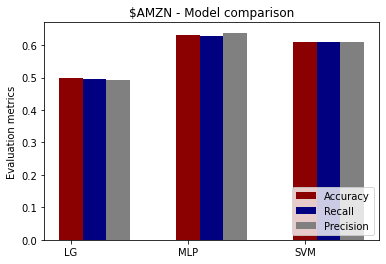

In [ ]:
import matplotlib.pyplot as plt

%matplotlib inline

fig, ax = plt.subplots()

width = 0.2  # the width of the bars
labels = df_performance.columns
x = np.arange(len(labels))  # the label locations

ax.bar(x, df_performance.iloc[0, :], width, label="Accuracy", color="darkred")
ax.bar(x + width, df_performance.iloc[1, :], width, label="Recall", color="navy")
ax.bar(x + 2 * width, df_performance.iloc[2, :], width, label="Precision", color="grey")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel("Evaluation metrics")
ax.set_title("$AMZN - Model comparison")
ax.set_xticks(x)
ax.set_xticklabels(labels)
#plt.grid(b=None)
ax.legend(loc='lower right')

plt.savefig('test.png')

In [ ]:
df_performance = df_performance.T
df_performance.head()

,LG,MLP,SVM
Accuracy,0.500000,0.630000,0.610000
Recall,0.494998,0.627251,0.609244
Precision,0.493333,0.638021,0.609903


###Comparing models using the test set method

In [ ]:
from sklearn.metrics import accuracy_score
import numpy as np

#TEST SET
acc_lr_test = accuracy_score(y_test, y_pred_test_lr)
acc_mlp_test = accuracy_score(y_test, y_pred_test_mlp)
acc_svm_test = accuracy_score(y_test, y_pred_test_svm)


#TRAINING SET
acc_lr_train = accuracy_score(y_train, y_pred_train_lr)
acc_mlp_train = accuracy_score(y_train, y_pred_train_mlp)
acc_svm_train = accuracy_score(y_train, y_pred_train_svm)


acc_test = np.array([acc_lr_test, acc_mlp_test, acc_svm_test])
acc_train = np.array([acc_lr_train, acc_mlp_train, acc_svm_train])

acc = pd.DataFrame([acc_test, acc_train])


acc = acc.T
acc.columns = ["Accuracy_test", "Accuracy_train"]
acc.index = ["LR", "MLP", "SVM"]


acc.sort_values(by=["Accuracy_train"], ascending=False)

In [ ]:
print("\n======\n")

print(y_train.shape)

print("\n======\n")

print(y_train)

print("\n======\n")

print("Number of Positive Returns: %s" % np.count_nonzero(y_train == 1))
print("Number of Negative Returns: %s" % np.count_nonzero(y_train == 0))

In [ ]:
print("\n======\n")

print(y_test.shape)

print("\n======\n")

print(y_test)

print("\n======\n")

print("Number of Positive Returns: %s" % np.count_nonzero(y_test == 1))
print("Number of Negative Returns: %s" % np.count_nonzero(y_test == 0))

###Confusion Matrices of the Models

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(font_scale=1.25)
sns.set(style="white")
from sklearn.metrics import confusion_matrix
import numpy as np

### CONFUSION MATRIX OF TRAINING SET

cf_matrix = confusion_matrix(y_train, y_pred_train_svm) # change _mlp, _lr, _svm

group_names = ["True Neg", "False Neg", "False Pos", "True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = [
    "{0:.2%}".format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)

fig = plt.figure()
sns.heatmap(cf_matrix, annot=labels, fmt="", cmap="Blues")
plt.show()

In [ ]:
#import matplotlib.pyplot as plt
#%matplotlib inline
#import seaborn as sns
#sns.set(font_scale=1.25)
#sns.set(style="white")
#from sklearn.metrics import confusion_matrix
#import numpy as np

### CONFUSION MATRIX OF TEST SET

cf_matrix = confusion_matrix(y_test, y_pred_test_svm) # change _mlp, _lr, _svm

group_names = ["True Neg", "False Neg", "False Pos", "True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = [
    "{0:.2%}".format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)

fig = plt.figure()
sns.heatmap(cf_matrix, annot=labels, fmt="", cmap="Blues")
plt.show()

# **Hyper-Parameter Tuning**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

## MLP

In [ ]:
# GridSearchCV for MLP Classifier
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score

#scorer = make_scorer(accuracy_score)

mlp_tune = MLPClassifier(random_state=random_seed_val)


parameter_space_mlp = {

  "hidden_layer_sizes": [(100, 100, 100), (50, 50, 50), (100, 200, 100)],   # (200, 200, 200), (100,), (50, 100, 50)
  "activation": ["tanh", "relu", "logisitc"],                     # "relu", "logistic"
  "solver": ["adam", "sgd", "lbfgs"],                  # "lbfgs"
  "alpha": [0.00005, 0.0001, 0.005, 0.0005],                          # 0.001, 0.0005
  "learning_rate": ["constant", "adaptive", "invscaling"],  # "invscaling"
  "max_iter": [100, 200, 500, 1000]                    # 200, 500, 10000

}

GSCV_mlp = GridSearchCV(mlp_tune, parameter_space_mlp, n_jobs=-1, cv=3) # scoring = scorer
GSCV_mlp.fit(x_1_train, y_train)


# Complete MLP Parameter Space from scikit-learn
# --> Check in the LINK when which parameter is applicable and in which combination

# LINK: https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

#"hidden_layer_sizes": tuple, length = n_layers - 2, default=(100,) --> e.g. (100, 100, 100), (100, 200, 100), (50, 50, 50)
#"activation": {‘identity’, ‘logistic’, ‘tanh’, ‘relu’}, default=’relu’
#"solver": {‘lbfgs’, ‘sgd’, ‘adam’}, default=’adam’
#"alpha": float, default=0.0001 --> e.g. 0.005, 0.001, 0.0005
#"batch_size": int, default=’auto’
#"learning_rate": {‘constant’, ‘invscaling’, ‘adaptive’}, default=’constant’
#"learning_rate_init": double, default=0.001
#"power_t": double, default=0.5
#"max_iter": int, default=200
#"shuffle": bool, default=True
#"random_state": int, RandomState instance, default=None
#"tol": float, default=1e-4
#"verbose": bool, default=False
#"warm_start": bool, default=False
#"momentum": float, default=0.9 --> E [0, 1] & only used when solver="sgd"
#"nesterovs_momentum": boolean, default=True
#"early_stopping": bool, default=False
#"validation_fraction": float, default=0.1
#"beta_1": float, default=0.9 --> should be in [0, 1) & only used for solver="adam"
#"beta_2": float, default=0.999 --> should be in [0, 1) & only used for solver="adam"
#"epsilon": float, default=1e-8 --> should be in [0, 1) & only used for solver="adam"
#"n_iter_no_change": int, default=10
#"max_fun": int, default=15000


In [ ]:
print("Best parameters found:\n", GSCV_mlp.best_params_)

In [ ]:
# TRAIN SET CLASSIFICATION REPORT

from sklearn.metrics import classification_report

grid_pred_train_mlp = GSCV_mlp.predict(x_1_train)

#print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_train,grid_pred_train_mlp))

accuracy_score(y_train, grid_pred_train_mlp)

In [ ]:
# TEST SET CLASSIFICATION REPORT

grid_pred_test_mlp = GSCV_mlp.predict(x_1_test)

#print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_pred_test_mlp))

In [ ]:
# Confusion Matrix - TEST Set

cf_matrix_test_mlp = confusion_matrix(y_test, grid_pred_test_mlp)

cf_matrix_test_mlp

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp_clf = MLPClassifier(
    random_state = random_seed_val, activation = 'tanh', alpha = 0.0001, hidden_layer_sizes = (100, 100, 100), learning_rate = 'constant', solver = 'lbfgs', max_iter = 10000
)
mlp_clf.fit(x_1_train, y_train)

y_pred_train_mlp = mlp_clf.predict(x_1_train)
y_pred_test_mlp = mlp_clf.predict(x_1_test)
model_list_mlp = mlp_clf


print("\n======\n")

print("Accuracy of Train Set: %f" % accuracy_score(y_train, y_pred_train_mlp))

print("\n======\n")

print("Accuracy of Test Set: %f" % accuracy_score(y_test, y_pred_test_mlp))

print("\n======\n")


## Logistic Regression

In [ ]:
# GridSearchCV for Logistic Regression

lr_tune = LogisticRegression(random_state=random_seed_val)

parameter_space_lr = {

    "penalty":["l1", "l2", "elasticnet"],                             # "l2", "elasticnet"
    "C":[0.25, 0.5, 0.75, 1, 2, 5, 10],
    "solver":["lbfgs", "newton-cg", "liblinear"],                    # "sag", "saga", "liblinear",
    #"multi_class": ["auto", "ovr", "multinomial"],
    "max_iter":[100, 500, 1000, 5000],
    "verbose":[5, 10, 50, 100, 500],
}

GSCV_lr = GridSearchCV(lr_tune, parameter_space_lr, n_jobs=-1, cv=3)
GSCV_lr.fit(x_1_train, y_train)




# Complete Log Reg Parameter Space from scikit-learn
# --> Check in the LINK when which parameter is applicable and in which combination

# LINK: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

#"penalty": {‘l1’, ‘l2’, ‘elasticnet’, ‘none’}, default=’l2’
#"dual": bool, default=False
#"tol": float, default=1e-4
#"C": float, default=1.0
#"fit_intercept": bool, default=True
#"intercept_scaling": float, default=1
#"class_weight": dict or ‘balanced’, default=None
#"random_state": int, RandomState instance, default=None
#"solver": {‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, default=’lbfgs’
#"max_iter": int, default=100
#"multi_class": {‘auto’, ‘ovr’, ‘multinomial’}, default=’auto’
#"verbose": int, default=0
#"warm_start": bool, default=False
#"n_jobs": int, default=None
#"l1_ratio": float, default=None



In [ ]:
print("Best parameters found:\n", GSCV_lr.best_params_)

In [ ]:
# TRAIN SET CLASSIFICATION REPORT

grid_pred_train_lr = GSCV_lr.predict(x_1_train)

#print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_train,grid_pred_train_lr))

In [ ]:
# TEST SET CLASSIFICATION REPORT

grid_pred_test_lr = GSCV_lr.predict(x_1_test)

#print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_pred_test_lr))

In [ ]:
# Confusion Matrix - TEST Set

cf_matrix_test_lr = confusion_matrix(y_test, grid_pred_test_lr)

cf_matrix_test_lr

## SVM

In [ ]:
# GridSearchCV for Support Vector Machines Classifier    ### WATCH OUT! --> "poly" is the one which let's it run for an eternity, make one at a time


svm_tune = svm.SVC(random_state=random_seed_val)

parameter_space_svm = {

    'C': [0.1, 1, 2, 3, 5, 10],                                             # 0.125, 0.25, 0.5, 1, 2, 5, 10
    'gamma': [3, 2, 1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ["rbf", "linear", "sigmoid"],                                   # "poly","sigmoid", "rbf", "linear"
    #"cache_size": [100, 200, 500],
    #'decision_function_shape': ['ovo', 'ovr'],
    "class_weight": ["dict", "balanced", "None"]                  # "dict", "balanced", "None"
}

GSCV_svm = GridSearchCV(svm_tune, parameter_space_svm, n_jobs=-1, cv=3)   #   verbose=2, refit=True
GSCV_svm.fit(x_1_train, y_train)



#grid = GridSearchCV(svm.SVC(),param_grid,refit=True,verbose=2)
#grid.fit(x_1_train,y_train)

# https://scikit-learn.org/stable/modules/svm.html
# Check there is some option with underrepresentated class


# Complete SVM Parameter Space from scikit-learn
# --> Check in the LINK when which parameter is applicable and in which combination

# LINK: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html


#"C": float, default=1.0
#"kernel": {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}, default=’rbf’
#"degree": int, default=3
#"gamma": {‘scale’, ‘auto’} or float, default=’scale’
#"coef0": float, default=0.0
#"shrinking": bool, default=True
#"probability": bool, default=False
#"tol": float, default=1e-3
#"cache_size": float, default=200
#"class_weight": dict or ‘balanced’, default=None
#"verbose": bool, default=False
#"max_iter": int, default=-1
#"decision_function_shape": {‘ovo’, ‘ovr’}, default=’ovr’
#"break_ties": bool, default=False
#"random_state": int or RandomState instance, default=None


In [ ]:
print("Best parameters found:\n", GSCV_svm.best_params_)

In [ ]:
# TRAIN SET CLASSIFICATION REPORT

grid_pred_train_svm = GSCV_svm.predict(x_1_train)

#print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_train,grid_pred_train_svm))

In [ ]:
# TEST SET CLASSIFICATION REPORT

grid_pred_test_svm = GSCV_svm.predict(x_1_test)

#print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_pred_test_svm))

In [ ]:
# Confusion Matrix - TEST Set

cf_matrix_test_svm = confusion_matrix(y_test, grid_pred_test_svm)

cf_matrix_test_svm

# **Trading Strategy**

In [ ]:
z = len(y)
n = len(y_train)
m = len(y_test)
print(z)
print(n)
print(m)


In [ ]:
# Create Data Frames to extract the relevant rows of the Date column

merged3sentiment_train = merged3sentiment.head(int(len(merged3sentiment)*(n/z)))

print(merged3sentiment_train.shape)
merged3sentiment_train


merged3sentiment_test = merged3sentiment.tail(int(len(merged3sentiment)*(m/z)))

print(merged3sentiment_test.shape)
merged3sentiment_test

In [ ]:
##Obtain prediction for highest accruacy model on training set
#pred_df = pd.DataFrame(grid_pred_test_mlp , columns=["Predicted"])

Date = merged3sentiment_test["date"].to_numpy()

pred = pd.DataFrame([Date, y_test, grid_pred_test_mlp])  # --> change here to     _svm, _mlp, _lr
pred = pred.T
pred.columns = ["Date", "Ground Truth", "Predicted"]

print(pred.shape)
pred


In [ ]:
###Getting dates#### Must unfourtunalty be updated mannually!

#date_trading = merged3sentiment["date"]
#date_trading
#date_trading=date_trading[198:249,].reset_index()   # Train Set [0, 198] & Test Set [199, 248]

#date_trading=date_trading.drop(columns=["index"])

#print(date_trading.shape)
#date_trading

In [ ]:
#Finadl = pd.concat([pred, date_trading], axis=1)

#Finadl

In [ ]:
#Merge the Pred Data Frame with histdata which contains the level of returns

histdata = histdata[["returns"]]
print(histdata.shape)
print("\n=======\n")
histdata

mergedtrading = pred.merge(histdata, left_on="Date", right_on="Date")  ### mergedtrading = pred.merge(histdata, left_on="date", right_on="Date")
print(mergedtrading.shape)
mergedtrading

In [ ]:
##Buy and hold returns
mergedtrading["buyandhold"] = (mergedtrading["returns"] + 1).cumprod()  # --> Cumulated Product

mergedtrading

In [ ]:
#Buy when it predicted up, short-sell when it predicted down

import numpy as np

mergedtrading["help_column"] = np.where(mergedtrading["Predicted"]==1, 1, -1)
mergedtrading["help_column_2"] = mergedtrading["returns"]*mergedtrading["help_column"]
mergedtrading["strategy"] = (mergedtrading["help_column_2"] + 1).cumprod()

mergedtrading

In [ ]:
mergedtrading.drop(columns=["help_column", "help_column_2","returns", "Predicted"]).tail(2)

In [ ]:
##Adjustements for plot(making it able to start from 1)
#Resetting index
mergedtrading=mergedtrading.set_index("Date")

# Creating a new data fram with value of 1 for the two strategys. Then adding it to exising dataframe
helpdf=pd.DataFrame(data={'date': ["2020-09-02"], 'buyandhold': [1], 'strategy': [1]})
helpdf['date'] = pd.to_datetime(helpdf['date'])
helpdf=helpdf.set_index("date")

mergedtrading=pd.concat([helpdf,mergedtrading])

#Takning minus 1
mergedtrading["buyandhold"]= mergedtrading["buyandhold"]-1
mergedtrading["strategy"]= mergedtrading["strategy"]-1

In [ ]:
##Plotting result
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(10, 10))

ax.plot(mergedtrading.index.values,
        mergedtrading['strategy'],
        "b--",
        linewidth=2.5,
        label="Trading Strategy"
        )

ax.plot(mergedtrading.index.values,
        mergedtrading['buyandhold'],
        color="yellow",
        label='Buy and hold'
        )

ax.set(xlabel="Date",
       ylabel="Returns",
       title="Investment Strategys"
       )

plt.legend()